In [13]:
import pickle
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from skimage.feature import hog
import os

%matplotlib inline

In [2]:
os.getcwd()

'D:\\GitHub\\Udacity_CarND_P5_Vehicle_Detection'

In [9]:
with open('condition_1.pickle', 'rb') as handle:
    trained_data = pickle.load(handle)

In [10]:
svc = trained_data['model']
color_space = trained_data['color_space']
X_scaler = trained_data['scaler']
orient = trained_data['orient']
pix_per_cell = trained_data['pix_per_cell']
cell_per_block = trained_data['cell_per_block']
spatial_size = trained_data['spatial_size']
hist_bins = trained_data['hist_bins']
hog_channel = trained_data['hog_channel']
hist_bins = trained_data['hist_bins']
hog_channel = trained_data['hog_channel']
spatial_feat = trained_data['spatial_feat']
hist_feat = trained_data['hist_feat']
hog_feat = trained_data['hog_feat']


In [37]:
hist_feat

True

In [14]:
img = cv2.imread('../image_data_Udacity_CarND_P5/vehicles/GTI_Far/image0000.png')

In [6]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block,
                     vis=False, feature_vec=True):
    '''
    :param img: target image to convert
    :param orient: orient for HOG transformation
    :param pix_per_cell: pixel for cell of HOG transformation
    :param cell_per_block: number of cell in block
    :param vis: Key to use visualization or not
    :param feature_vec: Key to use feature vector
    :return: HOG future
    '''
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient,
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  transform_sqrt=True,
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:
        features = hog(img, orientations=orient,
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block),
                       transform_sqrt=True,
                       visualise=vis, feature_vector=feature_vec)
        return features

def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel()
    # Return the feature vector
    return features

# Define a function to compute color histogram features
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:, :, 0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:, :, 1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:, :, 2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features
def extract_features(img_paths, color_space='RGB', spatial_size=(32, 32),
                     hist_bins=32, orient=9,
                     pix_per_cell=8, cell_per_block=2, hog_channel=0,
                     spatial_feat=True, hist_feat=True, hog_feat=True):


    # Iterate through the list of images
    features = []
    for count,file in enumerate(img_paths):
        if count % (len(img_paths)/10)==0:
            print("extraction was done",count,"/",len(img_paths))
        else:
            pass
        file_features = []
        # Read in each one by one
        image = cv2.imread(file)
        image_original = np.copy(image)
        # apply color conversion if other than 'RGB'
        if color_space != 'BGR':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2LUV)
            elif color_space == 'RGB':
                feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else:
            feature_image = np.copy(image)

        channel_1 = cv2.equalizeHist(feature_image[:, :, 0])
        channel_2 = cv2.equalizeHist(feature_image[:, :, 1])
        channel_3 = cv2.equalizeHist(feature_image[:, :, 2])
        feature_image = cv2.merge((channel_1,channel_2,channel_3))

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
            # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:, :, channel],
                                                         orient, pix_per_cell, cell_per_block,
                                                         vis=False, feature_vec=True))
                    # f,image_tosho = get_hog_features(feature_image[:, :, channel],orient, pix_per_cell, cell_per_block,
                    #                                  vis=True, feature_vec=True)
                hog_features_flat = np.ravel(hog_features)
            else:
                hog_features_flat = get_hog_features(feature_image[:, :, hog_channel], orient,
                                                     pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features_flat)
            temp_result = np.concatenate(file_features)
#             from IPython.core.debugger import Pdb; Pdb().set_trace()
        features.append(temp_result)
    # Return list of feature vectors
    return features


In [16]:
hist_feat

True

In [35]:
X_test = ['../image_data_Udacity_CarND_P5/non-vehicles/Extras/extra1.png',
         '../image_data_Udacity_CarND_P5/vehicles/KITTI_extracted/2.png',
         '../image_data_Udacity_CarND_P5/vehicles/KITTI_extracted/3.png',
         '../image_data_Udacity_CarND_P5/vehicles/KITTI_extracted/4.png',
         '../image_data_Udacity_CarND_P5/vehicles/KITTI_extracted/5.png']

X_feature = extract_features(
    X_test, color_space=color_space,
    spatial_size=spatial_size, hist_bins=hist_bins,
    orient=orient, pix_per_cell=pix_per_cell,
    cell_per_block=cell_per_block,
    hog_channel=hog_channel, spatial_feat=spatial_feat,
    hist_feat=True, hog_feat=hog_feat
)

extraction was done 0 / 5
extraction was done 1 / 5
extraction was done 2 / 5
extraction was done 3 / 5
extraction was done 4 / 5


c:\users\hitoshi\appdata\local\programs\python\python35\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


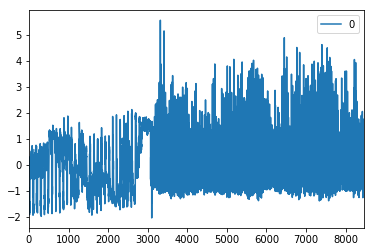

In [38]:
panda_data = pd.DataFrame(X_[0])
panda_data.plot.line()

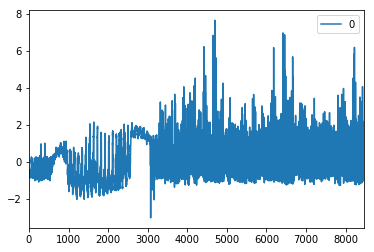

In [40]:
panda_data = pd.DataFrame(X_[1
                            ])
panda_data.plot.line()

In [24]:
X_ = X_scaler.transform(X_feature)

In [33]:
svc.predict(X_)

array([1., 1., 1., 1., 1.])

In [17]:
if spatial_feat == True:
    spatial_features = bin_spatial(img, size=spatial_size)

hist_feat = True
if hist_feat == True:
    # Apply color_hist()
    hist_features = color_hist(img, nbins=hist_bins)
if hog_feat == True:
    hog_1 = get_hog_features(img[:,:,0], orient, pix_per_cell, cell_per_block,
                             vis=False, feature_vec=True) 
    hog_2 = get_hog_features(img[:,:,1], orient, pix_per_cell, cell_per_block,
                         vis=False, feature_vec=True) 
    hog_3 = get_hog_features(img[:,:,2], orient, pix_per_cell, cell_per_block,
                             vis=False, feature_vec=True) 
    hog_feature = np.ravel(cv2.merge((hog_1,hog_2,hog_3)))

test_img = np.concatenate([spatial_features,hist_features,hog_feature])

c:\users\hitoshi\appdata\local\programs\python\python35\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [22]:
X_scaler.transform([test_img]).max()

18.413629857981576

In [18]:

svc.predict(X_scaler.transform([test_img]))

array([0.])

In [ ]:
X_test = ['../image_data_Udacity_CarND_P5/non-vehicles/GTI/image6.png']

X_feature = extract_features(
    X_test, color_space=color_space,
    spatial_size=spatial_size, hist_bins=hist_bins,
    orient=orient, pix_per_cell=pix_per_cell,
    cell_per_block=cell_per_block,
    hog_channel=hog_channel, spatial_feat=spatial_feat,
    hist_feat=True, hog_feat=hog_feat
)

In [ ]:
X_feature[0].shape

In [27]:
X_scaler.var_.shape

(8460,)

In [ ]:
len(X_feature)

In [ ]:
Scaler_data 

In [ ]:
Scaler_data.transform([X_feature[0][1:5],X_feature[1][6:10]])

In [33]:
if color_space != 'BGR':
    if color_space == 'HSV':
        feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    elif color_space == 'LUV':
        feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)
    elif color_space == 'RGB':
        feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space == 'HLS':
        feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    elif color_space == 'YUV':
        feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    elif color_space == 'YCrCb':
        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
else:
    feature_image = np.copy(img)

ch1 = img[:,:,0]
ch2 = img[:,:,1]
ch3 = img[:,:,2]

# Define blocks and steps as above
nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1
nfeat_per_block = orient*cell_per_block**2

# # Compute individual channel HOG features for the entire image
# def get_hog_features(img, orient, pix_per_cell, cell_per_block,
#                      vis=False, feature_vec=True):

channel_1 = cv2.equalizeHist(feature_image[:, :, 0])
channel_2 = cv2.equalizeHist(feature_image[:, :, 1])
channel_3 = cv2.equalizeHist(feature_image[:, :, 2])
feature_image = cv2.merge((channel_1,channel_2,channel_3))

file_features = []
if spatial_feat == True:
    spatial_features = bin_spatial(feature_image, size=spatial_size)
    file_features.append(spatial_features)

if hist_feat == True:
    # Apply color_hist()
    hist_features = color_hist(feature_image, nbins=hist_bins)
    file_features.append(hist_features)
if hog_feat == True:
    # Call get_hog_features() with vis=False, feature_vec=True
    if hog_channel == 'ALL':
        hog_features = []
        for channel in range(feature_image.shape[2]):
            hog_features.append(get_hog_features(feature_image[:, :, channel],
                                                 orient, pix_per_cell, cell_per_block,
                                                 vis=False, feature_vec=True))
            # f,image_tosho = get_hog_features(feature_image[:, :, channel],orient, pix_per_cell, cell_per_block,
            #                                  vis=True, feature_vec=True)
        hog_features = np.ravel(hog_features)
else:
    hog_features = get_hog_features(feature_image[:, :, hog_channel], orient,
                                    pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
file_features.append(hog_features)
temp_result = np.concatenate(file_features)


# test_features = X_scaler.transform(np.hstack((spatial_features, hog_features)).reshape(1, -1))

NameError: name 'img' is not defined

In [31]:
hog_features

NameError: name 'hog_features' is not defined

In [ ]:
np.ravel(hog_features)

In [ ]:
X_scaler.transform(np.hstack((spatial_features, hog_features)))

In [ ]:
if (spatial_feat == True) & (hist_feat == True):
    test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))
elif (spatial_feat == True) & (hist_feat == False):
    test_features = X_scaler.transform(np.hstack((spatial_features, hog_features)).reshape(1, -1))
elif (spatial_feat == False) & (hist_feat == True):
    test_features = X_scaler.transform(np.hstack((hist_feat, hog_features)).reshape(1, -1))
else:
    test_features = X_scaler.transform(np.hstack((hog_features)).reshape(1, -1))

In [ ]:
hog1.shape

In [ ]:
os.path.exists('../image_data_Udacity_CarND_P5/vehicles/GTI_Far')

In [ ]:
images_car_far = glob.glob('../image_data_Udacity_CarND_P5/vehicles/GTI_Far/*.png')
images_car_left = glob.glob('../image_data_Udacity_CarND_P5/vehicles/GTI_Left/*.png')
images_car_MiddleClose = glob.glob('../image_data_Udacity_CarND_P5/vehicles/GTI_MiddleClose/*.png')
images_car_right = glob.glob('../image_data_Udacity_CarND_P5/vehicles/GTI_Right/*.png')
images_car_KITTI_extracted = glob.glob('../image_data_Udacity_CarND_P5/vehicles/KITTI_extracted/*.png')
images_noncar_Extras = glob.glob('../image_data_Udacity_CarND_P5/non-vehicles/Extras/*.png')
images_noncar_GIT = glob.glob('../image_data_Udacity_CarND_P5/non-vehicles/GTI/*.png')


In [ ]:
images_noncar_GIT


In [ ]:
import cv2
import glob
import os
import pandas as pd
import numpy as np

IMAGE_DATA_PATH = os.path.join('..','image_data_Udacity_CarND_P5')

In [ ]:
od_data = pd.read_csv(os.path.join(IMAGE_DATA_PATH,'od_data.csv'))
odc_data = pd.read_csv(os.path.join(IMAGE_DATA_PATH,'odc_data.csv'))

In [ ]:
odc_data[odc_data.label == 'Car'].count()

In [ ]:
car_label = pd.concat([od_data[od_data.label == 'car'].path,
                       odc_data[odc_data.label == 'Car'].path])

In [ ]:
non_car_label = pd.concat([od_data[(od_data.label == 'trafficLight') &
                               (od_data.label == 'pedestrian') &
                               (od_data.label == 'biker') ].path,
                       odc_data[odc_data.label == 'Pedestrian'].path])

In [ ]:
odc_data.label.value_counts()

In [ ]:
od_data.label.unique()

In [ ]:
odc_data[odc_data.label=='Car'].path[0]

In [ ]:
import cv2
im = cv2.imread(odc_data[odc_data.label=='Car'].path[0])

In [ ]:
plt.imshow(im)
plt.show()

# Visualization of Udacity data (object-dataset)

In [ ]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import cv2
import math
import random

number_of_sample = 10
paths = random.sample(list(od_data[od_data.label=='car'].path), number_of_sample)

fig = plt.figure(figsize=(15, 20))
for i in range(number_of_sample):
    exec('ax' + str(i+1) +'= fig.add_subplot(9,5,' + str(i+1) +')') 
    img = cv2.imread(paths[i])
    exec('ax' + str(i+1) +'.imshow(img)')
plt.show()

In [ ]:
number_of_sample = 10
paths = random.sample(list(od_data[od_data.label=='truck'].path), number_of_sample)

fig = plt.figure(figsize=(15, 20))
for i in range(number_of_sample):
    exec('ax' + str(i+1) +'= fig.add_subplot(9,5,' + str(i+1) +')') 
    img = cv2.imread(paths[i])
    exec('ax' + str(i+1) +'.imshow(img)')
#     exec('ax' + str(i+1) +'.set_title(' + str(i) + ')')
plt.show()

In [ ]:
number_of_sample = 10
paths = random.sample(list(od_data[od_data.label=='trafficLight'].path), number_of_sample)

fig = plt.figure(figsize=(15, 20))
for i in range(number_of_sample):
    exec('ax' + str(i+1) +'= fig.add_subplot(9,5,' + str(i+1) +')') 
    img = cv2.imread(paths[i])
    exec('ax' + str(i+1) +'.imshow(img)')
plt.show()

In [ ]:
number_of_sample = 10
paths = random.sample(list(od_data[od_data.label=='pedestrian'].path), number_of_sample)

fig = plt.figure(figsize=(15, 20))
for i in range(number_of_sample):
    exec('ax' + str(i+1) +'= fig.add_subplot(9,5,' + str(i+1) +')') 
    img = cv2.imread(paths[i])
    exec('ax' + str(i+1) +'.imshow(img)')
plt.show()

In [ ]:
number_of_sample = 10
paths = random.sample(list(od_data[od_data.label=='biker'].path), number_of_sample)

fig = plt.figure(figsize=(15, 20))
for i in range(number_of_sample):
    exec('ax' + str(i+1) +'= fig.add_subplot(9,5,' + str(i+1) +')') 
    img = cv2.imread(paths[i])
    exec('ax' + str(i+1) +'.imshow(img)')
plt.show()

In [ ]:
od_data.label.value_counts()

# Visualization of Udacity data (object-dataset-crowdai)

In [ ]:
number_of_sample = 10
paths = random.sample(list(odc_data[odc_data.label=='Car'].path), number_of_sample)

fig = plt.figure(figsize=(15, 20))
for i in range(number_of_sample):
    exec('ax' + str(i+1) +'= fig.add_subplot(9,5,' + str(i+1) +')') 
    img = cv2.imread(paths[i])
    exec('ax' + str(i+1) +'.imshow(img)')
plt.show()

In [ ]:
number_of_sample = 10
paths = random.sample(list(odc_data[odc_data.label=='Truck'].path), number_of_sample)

fig = plt.figure(figsize=(15, 20))
for i in range(number_of_sample):
    exec('ax' + str(i+1) +'= fig.add_subplot(9,5,' + str(i+1) +')') 
    img = cv2.imread(paths[i])
    exec('ax' + str(i+1) +'.imshow(img)')
plt.show()

In [ ]:
number_of_sample = 10
paths = random.sample(list(odc_data[odc_data.label=='Pedestrian'].path), number_of_sample)

fig = plt.figure(figsize=(15, 20))
for i in range(number_of_sample):
    exec('ax' + str(i+1) +'= fig.add_subplot(9,5,' + str(i+1) +')') 
    img = cv2.imread(paths[i])
    exec('ax' + str(i+1) +'.imshow(img)')
plt.show()

In [ ]:
odc_data.label.value_counts()